# CNN Modeling

To run this notebook, all cells can be run in order. The Model Selection section will perform cross-validation between the 4 selected CNN models and plots the results comparing CV accuracy and weighted f1-score. The Final Model section then fully trains the top performing architecture, saves the final model, and creates diagnostic plots.

In [ ]:
# import dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from src import train
import importlib
importlib.reload(train)
from src.train import *
from src.data_loader import *

## Model Selection
Use Cross-Validation to identify the most well-suited pre-trained CNN for this task.

In [3]:
try:
    train_CV('EfficientNetB0', model_desc='ENB0_1', BATCH_SIZE=64)
except Exception as e:
    print(e)

Training fold 1/5...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Epoch 1: val_loss improved from inf to 0.94741, saving model to ../results/models/ENB0_1_fold1_best_model.keras

Epoch 2: val_loss improved from 0.94741 to 0.85329, saving model to ../results/models/ENB0_1_fold1_best_model.keras

Epoch 3: val_loss improved from 0.85329 to 0.72370, saving model to ../results/models/ENB0_1_fold1_best_model.keras

Epoch 4: val_loss improved from 0.72370 to 0.29528, saving model to ../results/models/ENB0_1_fold1_best_model.keras

Epoch 5: val_loss did not improve from 0.29528

Epoch 6: val_loss did not improve from 0.29528

Epoch 7: val_loss did not improve from 0.29528
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 687ms/step
Fold 1 completed with Accuracy: 0.9156, F1-Score: 0.9160
Training fold 2/5...

Epoch 1: val_loss improved from inf to 0.55974, saving model to ../results/models/ENB0_1_fold2_best_model.keras

Epoch 2: val_loss did not improve from 0.55974

Epoch 3: val_loss did not improve from


Epoch 2: val_loss improved from 6.52709 to 3.80482, saving model to ../results/models/MNV2_2_fold4_24185738_best_model.keras

Epoch 2: val_loss did not improve from 4.51511

Epoch 2: val_loss did not improve from 4.30146

Epoch 3: val_loss did not improve from 4.51511

Epoch 3: val_loss did not improve from 3.80482

Epoch 3: val_loss did not improve from 4.30146

Epoch 4: val_loss did not improve from 4.51511

Epoch 4: val_loss did not improve from 3.80482
 9/36 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step
Epoch 4: val_loss did not improve from 4.30146
36/36 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step
Fold 1 completed with Accuracy: 0.4098, F1-Score: 0.3062
36/36 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step
Fold 2 completed with Accuracy: 0.4382, F1-Score: 0.3126

Epoch 5: val_loss did not improve from 3.80482
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 928ms/step
Fold 4 completed with Accuracy: 0.3541, F1-Score: 0.2571


In [14]:
try:
    train_CV('LeNet', model_desc='LN_1', BATCH_SIZE=64)
except Exception as e:
    print(e)

Training fold 1/5...


/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.35119, saving model to ../results/models/LN_1_fold1_best_model.keras

Epoch 2: val_loss improved from 1.35119 to 1.14710, saving model to ../results/models/LN_1_fold1_best_model.keras

Epoch 3: val_loss did not improve from 1.14710

Epoch 4: val_loss did not improve from 1.14710

Epoch 5: val_loss did not improve from 1.14710
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
Fold 1 completed with Accuracy: 0.5680, F1-Score: 0.5612
Training fold 2/5...


/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.45395, saving model to ../results/models/LN_1_fold2_best_model.keras

Epoch 2: val_loss improved from 1.45395 to 1.29035, saving model to ../results/models/LN_1_fold2_best_model.keras

Epoch 3: val_loss did not improve from 1.29035

Epoch 4: val_loss did not improve from 1.29035

Epoch 5: val_loss did not improve from 1.29035
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step
Fold 2 completed with Accuracy: 0.4818, F1-Score: 0.4650
Training fold 3/5...


/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.38893, saving model to ../results/models/LN_1_fold3_best_model.keras

Epoch 2: val_loss improved from 1.38893 to 1.18937, saving model to ../results/models/LN_1_fold3_best_model.keras

Epoch 3: val_loss did not improve from 1.18937

Epoch 4: val_loss did not improve from 1.18937

Epoch 5: val_loss did not improve from 1.18937
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step
Fold 3 completed with Accuracy: 0.5431, F1-Score: 0.5382
Training fold 4/5...


/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.44600, saving model to ../results/models/LN_1_fold4_best_model.keras

Epoch 2: val_loss improved from 1.44600 to 1.31921, saving model to ../results/models/LN_1_fold4_best_model.keras

Epoch 3: val_loss did not improve from 1.31921

Epoch 4: val_loss did not improve from 1.31921

Epoch 5: val_loss did not improve from 1.31921
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step
Fold 4 completed with Accuracy: 0.5116, F1-Score: 0.4956
Training fold 5/5...


/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.53401, saving model to ../results/models/LN_1_fold5_best_model.keras

Epoch 2: val_loss improved from 1.53401 to 1.49334, saving model to ../results/models/LN_1_fold5_best_model.keras

Epoch 3: val_loss improved from 1.49334 to 1.48033, saving model to ../results/models/LN_1_fold5_best_model.keras

Epoch 4: val_loss improved from 1.48033 to 1.46736, saving model to ../results/models/LN_1_fold5_best_model.keras

Epoch 5: val_loss did not improve from 1.46736

Epoch 6: val_loss did not improve from 1.46736

Epoch 7: val_loss did not improve from 1.46736
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step
Fold 5 completed with Accuracy: 0.3621, F1-Score: 0.2408


In [5]:
try:
    train_CV('ResNet50', model_desc='RN50_1', BATCH_SIZE=64)
except Exception as e:
    print(e)

Training fold 1/5...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Epoch 1: val_loss improved from inf to 3.30755, saving model to ../results/models/RN50_1_fold1_best_model.keras

Epoch 2: val_loss improved from 3.30755 to 1.39775, saving model to ../results/models/RN50_1_fold1_best_model.keras

Epoch 3: val_loss did not improve from 1.39775

Epoch 4: val_loss improved from 1.39775 to 0.89316, saving model to ../results/models/RN50_1_fold1_best_model.keras

Epoch 5: val_loss did not improve from 0.89316

Epoch 6: val_loss did not improve from 0.89316

Epoch 7: val_loss did not improve from 0.89316
36/36 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step
Fold 1 completed with Accuracy: 0.6764, F1-Score: 0.6486
Training fold 2/5...

Epoch 1: val_loss improved from inf to 8.89195, saving model to ../results/models/RN50_1_fold2_best_model.keras

Epoch 2: val_loss improved from 8.89195 to 1.65592, saving model to ../results/models/RN50_1_fold2_best_model.keras

Epoch 3: val_loss improved from 1.65592 t

In [2]:
train_CV('MobileNetV2', model_desc='MNV2_1')

Training fold 1/5...


/Users/landon/Coding/CMSE492/cmse492_project/notebooks/../src/train.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



Epoch 1: val_loss improved from inf to 4.33651, saving model to ../results/models/MNV2_1_fold1_best_model.keras

Epoch 2: val_loss improved from 4.33651 to 3.68973, saving model to ../results/models/MNV2_1_fold1_best_model.keras

Epoch 3: val_loss did not improve from 3.68973

Epoch 4: val_loss did not improve from 3.68973

Epoch 5: val_loss did not improve from 3.68973
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step
Fold 1 completed with Accuracy: 0.4933, F1-Score: 0.4383
Training fold 2/5...


/Users/landon/Coding/CMSE492/cmse492_project/notebooks/../src/train.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



Epoch 1: val_loss improved from inf to 5.62539, saving model to ../results/models/MNV2_1_fold2_best_model.keras

Epoch 2: val_loss improved from 5.62539 to 3.16357, saving model to ../results/models/MNV2_1_fold2_best_model.keras

Epoch 3: val_loss did not improve from 3.16357

Epoch 4: val_loss did not improve from 3.16357

Epoch 5: val_loss did not improve from 3.16357
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 392ms/step
Fold 2 completed with Accuracy: 0.4071, F1-Score: 0.3190
Training fold 3/5...


/Users/landon/Coding/CMSE492/cmse492_project/notebooks/../src/train.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



Epoch 1: val_loss improved from inf to 4.89043, saving model to ../results/models/MNV2_1_fold3_best_model.keras

Epoch 2: val_loss did not improve from 4.89043

Epoch 3: val_loss improved from 4.89043 to 4.76349, saving model to ../results/models/MNV2_1_fold3_best_model.keras

Epoch 4: val_loss improved from 4.76349 to 3.17601, saving model to ../results/models/MNV2_1_fold3_best_model.keras

Epoch 5: val_loss did not improve from 3.17601

Epoch 6: val_loss did not improve from 3.17601

Epoch 7: val_loss did not improve from 3.17601
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 394ms/step
Fold 3 completed with Accuracy: 0.4658, F1-Score: 0.4494
Training fold 4/5...


/Users/landon/Coding/CMSE492/cmse492_project/notebooks/../src/train.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



Epoch 1: val_loss improved from inf to 9.65895, saving model to ../results/models/MNV2_1_fold4_best_model.keras

Epoch 2: val_loss improved from 9.65895 to 4.12349, saving model to ../results/models/MNV2_1_fold4_best_model.keras

Epoch 3: val_loss did not improve from 4.12349

Epoch 4: val_loss improved from 4.12349 to 3.86527, saving model to ../results/models/MNV2_1_fold4_best_model.keras

Epoch 5: val_loss did not improve from 3.86527

Epoch 6: val_loss did not improve from 3.86527

Epoch 7: val_loss did not improve from 3.86527
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 414ms/step
Fold 4 completed with Accuracy: 0.4956, F1-Score: 0.4079
Training fold 5/5...


/Users/landon/Coding/CMSE492/cmse492_project/notebooks/../src/train.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(



Epoch 1: val_loss improved from inf to 1.72880, saving model to ../results/models/MNV2_1_fold5_best_model.keras

Epoch 2: val_loss did not improve from 1.72880

Epoch 3: val_loss did not improve from 1.72880

Epoch 4: val_loss did not improve from 1.72880
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 396ms/step
Fold 5 completed with Accuracy: 0.4626, F1-Score: 0.4360


{'model': 'MNV2_1',
 'accuracy': 0.46488145512060103,
 'f1_score': 0.4101199165626281,
 'saved_model_paths': ('../results/models/MNV2_1_fold1_best_model.keras',
  '../results/models/MNV2_1_fold2_best_model.keras',
  '../results/models/MNV2_1_fold3_best_model.keras',
  '../results/models/MNV2_1_fold4_best_model.keras',
  '../results/models/MNV2_1_fold5_best_model.keras')}

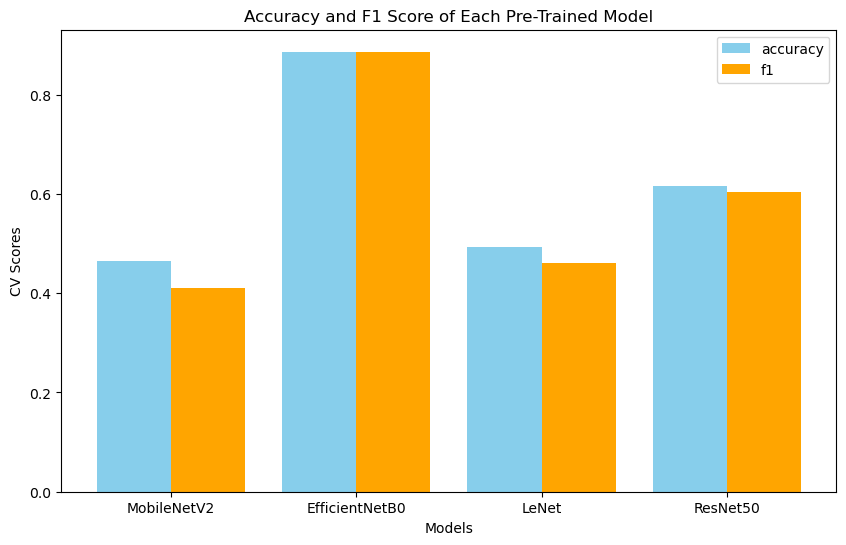

In [15]:
# Load data
df = pd.read_csv('../results/cv_scores.csv')

# Create an array for the positions of the groups of bars
x = np.arange(len(df['model']))

# Define the bar width
bar_width = 0.4

# Plot bars with offsets
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, df['accuracy'], width=bar_width, color='skyblue', label='accuracy')
plt.bar(x + bar_width / 2, df['f1'], width=bar_width, color='orange', label='f1')

# Add labels and titles
plt.xticks(x, ['MobileNetV2', 'EfficientNetB0', 'LeNet', 'ResNet50'])  # Set the x-axis tick labels to the model names
plt.title('Accuracy and F1 Score of Each Pre-Trained Model')
plt.xlabel('Models')
plt.ylabel('CV Scores')
plt.legend()

# Show the plot
plt.show()


## Final Model Training

In [ ]:
# Define final model
final_model = define_model('EfficientNetB0')  # Your function to create the model

# Define callbacks
final_model_save_path = '../results/models/final_ENB0_model.keras'
checkpoint = ModelCheckpoint(
    filepath=final_model_save_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

X_train, y_train = load_data('../data/processed/train/images')

# Train final model on full training data
history = final_model.fit(
    X_train, y_train,
    validation_split=0.2,  # Reserve 20% for validation during training
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Save the final model weights and architecture
final_model.save(final_model_save_path)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6011 - loss: 0.9856
Epoch 1: val_loss improved from inf to 1.25495, saving model to ../results/models/final_ENB0_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6027 - loss: 0.9822 - val_accuracy: 0.6169 - val_loss: 1.2550
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8940 - loss: 0.2989
Epoch 2: val_loss improved from 1.25495 to 0.74535, saving model to ../results/models/final_ENB0_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8940 - loss: 0.2988 - val_accuracy: 0.7413 - val_loss: 0.7453
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9431 - loss: 0.1713
Epoch 3: val_loss improved from 0.74535 to 0.57543, saving model to ../results/models/final_ENB0_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9431 - loss: 0.1713 - val_accuracy: 0.8133 - val_loss: 0.5754
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9618 - loss: 

44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step
Test Accuracy: 0.9324
Test F1-Score: 0.9326
Confusion Matrix:
[[442   0  15   0  13]
 [  0 106   1   0   0]
 [ 26   2 370   1  17]
 [  1   0   6 230   0]
 [  6   0   5   2 163]]
Classification Report:
               precision    recall  f1-score   support

      scratch       0.93      0.94      0.94       470
    tire flat       0.98      0.99      0.99       107
         dent       0.93      0.89      0.91       416
glass shatter       0.99      0.97      0.98       237
  lamp broken       0.84      0.93      0.88       176

     accuracy                           0.93      1406
    macro avg       0.94      0.94      0.94      1406
 weighted avg       0.93      0.93      0.93      1406



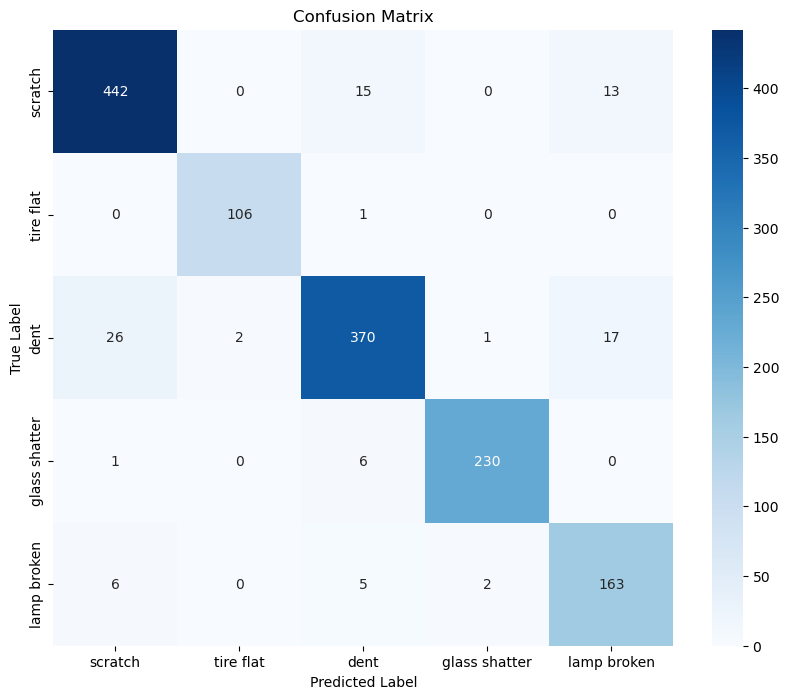

In [8]:
X_test, y_test = load_data('../data/processed/test/images', test=True)

# Predict on test set
y_pred_probs = final_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_names = ['scratch', 'tire flat', 'dent', 'glass shatter', 'lamp broken']
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

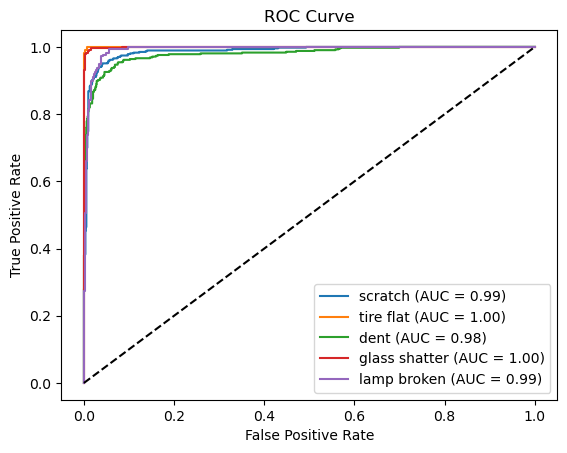

In [7]:
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


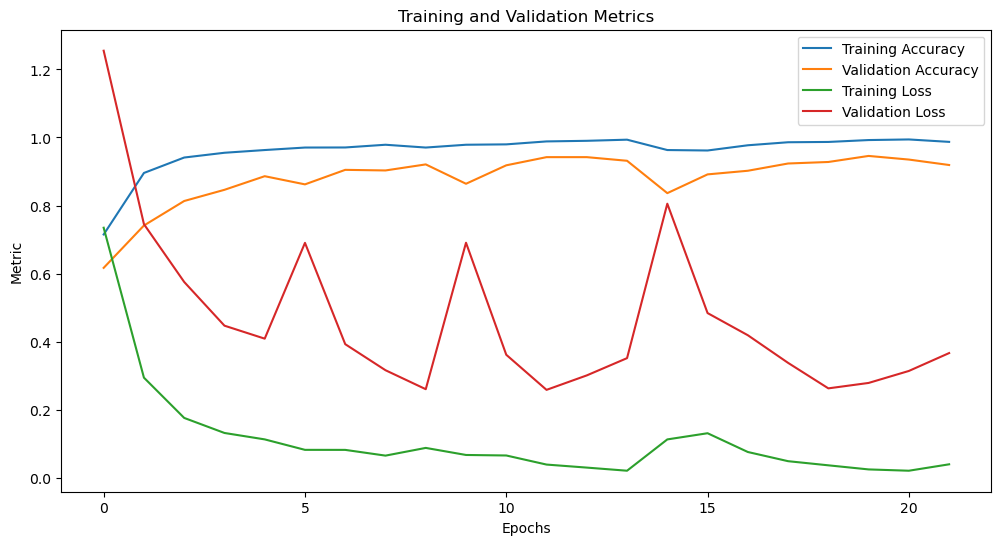

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()